In [1]:
import sys
sys.path.append('./utils')

In [3]:
#Imports
from requirements import *
import helperfunctions as helper

In [4]:
X_all = pd.read_csv("model_and_visualization/features_set_1.csv")
y_all = pd.read_csv("model_and_visualization/target_set_1.csv")
X_all = X_all.drop('Unnamed: 0',axis=1)
y_all = y_all.drop('Unnamed: 0',axis=1)

print len(X_all)
print len(y_all)
X_all.describe()


5309
5309


,word_count,long_word_count,avg_word_length_per_essay,wrong_words,no_of_domain_words,word_to_sent_ratio,num_of_characters,sentence_count,noun_count,verb_count,comma_count,punctuation_count,adjective_count,adverb_count,quotation_mark_count,spelling_mistakes
count,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000
mean,197.338105,46.362403,4.835283,45.079299,152.258806,13.492121,1532.813147,16.187983,62.791109,38.644377,10.174421,16.768318,19.873422,13.729328,3.817856,3.368243
std,116.878512,31.073141,0.351803,28.413772,90.775007,7.727928,921.793079,10.379520,37.776345,24.916955,9.545103,13.659156,13.228023,10.068848,4.964016,3.747873
min,6.000000,0.000000,3.170000,0.000000,4.000000,2.500000,39.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,95.000000,21.000000,4.600000,20.000000,74.000000,10.350000,723.000000,7.000000,31.000000,15.000000,3.000000,7.000000,9.000000,5.000000,0.000000,1.000000
50%,196.000000,42.000000,4.830000,43.000000,150.000000,12.190000,1523.000000,15.000000,61.000000,39.000000,8.000000,15.000000,18.000000,12.000000,2.000000,2.000000
75%,280.000000,66.000000,5.060000,65.000000,216.000000,14.530000,2184.000000,24.000000,88.000000,56.000000,15.000000,24.000000,28.000000,20.000000,6.000000,5.000000
max,720.000000,222.000000,6.190000,221.000000,585.000000,188.000000,5951.000000,85.000000,324.000000,196.000000,71.000000,643.000000,83.000000,61.000000,39.000000,59.000000


In [6]:
feature_columns = ["word_count","long_word_count","avg_word_length_per_essay","wrong_words","no_of_domain_words","word_to_sent_ratio","num_of_characters","sentence_count","noun_count","verb_count","comma_count","punctuation_count","adjective_count","adverb_count","quotation_mark_count","spelling_mistakes"]
feature_dict = {}
    
for f in feature_columns:
    score = helper.Evaluate(X_all,y_all,[f])
    feature_dict[f] = round(float(score)*100,4)
feature_dict

{'adjective_count': 45.6776,
 'adverb_count': 44.9248,
 'avg_word_length_per_essay': 6.1399,
 'comma_count': 29.3645,
 'long_word_count': 52.8763,
 'no_of_domain_words': 54.1624,
 'noun_count': 58.0308,
 'num_of_characters': 52.3543,
 'punctuation_count': 36.7938,
 'quotation_mark_count': 16.7022,
 'sentence_count': 57.4841,
 'spelling_mistakes': 27.0171,
 'verb_count': 49.3243,
 'word_count': 53.061,
 'word_to_sent_ratio': 3.5118,
 'wrong_words': 42.8039}

In [7]:
import operator
sorted_feature_list = sorted(feature_dict.items(), key=operator.itemgetter(1),reverse=True)

objects = [x[1] for x in sorted_feature_list]
features = ["("+str(i)+") "+sorted_feature_list[i][0] for i in range(len(sorted_feature_list))]
print features

['(0) noun_count', '(1) sentence_count', '(2) no_of_domain_words', '(3) word_count', '(4) long_word_count', '(5) num_of_characters', '(6) verb_count', '(7) adjective_count', '(8) adverb_count', '(9) wrong_words', '(10) punctuation_count', '(11) comma_count', '(12) spelling_mistakes', '(13) quotation_mark_count', '(14) avg_word_length_per_essay', '(15) word_to_sent_ratio']


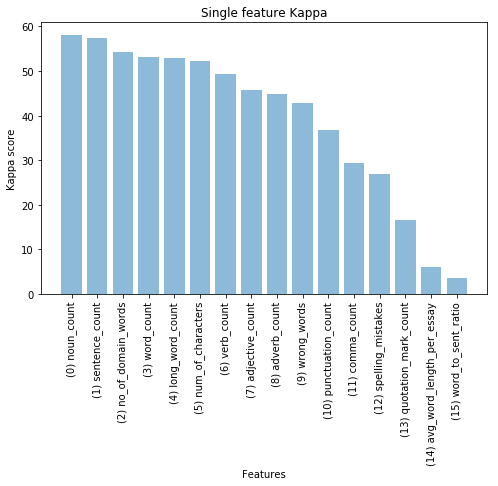

In [9]:
y_pos = np.arange(len(objects))
plt.figure(figsize=(8,5))
plt.bar(y_pos, objects, align='center', alpha=0.5)
plt.ylabel('Kappa score')
plt.xlabel('Features')
plt.xticks(y_pos,features,rotation=90)
plt.title('Single feature Kappa')
plt.show()

In [10]:
#Forward feature selection.
sorted_f = [i[0] for i in sorted_feature_list]
objects = []
results = []
for i in range(1,len(sorted_f)+1):
    forward_feature_list = sorted_f[:i]
    round(float(score)*100,4)
    result = round(float(helper.Evaluate(X_all,y_all,forward_feature_list))*100,4)
    results.append(result)
    objects.append(forward_feature_list)

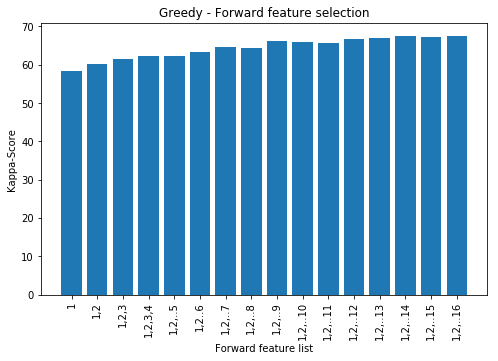

In [11]:
features = ['1','1,2','1,2,3','1,2,3,4','1,2,..5','1,2..6','1,2,..7','1,2,..8','1,2,..9',
            '1,2,..10','1,2,..11','1,2,..12','1,2,..13','1,2,..14','1,2,..15','1,2,..16']
y_pos = np.arange(len(objects))
plt.figure(figsize=(8,5))
plt.bar(y_pos,results)
plt.title('Greedy - Forward feature selection')
plt.ylabel('Kappa-Score')
plt.xlabel('Forward feature list')
plt.xticks(y_pos,features,rotation='vertical')
plt.show()

In [11]:
# Objects[14] has the highest kappa score as per the bar graph generated. 

selected_features = objects[14]

print helper.Evaluate(X_all,y_all,selected_features)
print helper.Evaluate(X_all,y_all,objects[15])

selected_features

0.67398132067
0.670105297108


['noun_count',
 'sentence_count',
 'no_of_domain_words',
 'word_count',
 'long_word_count',
 'num_of_characters',
 'verb_count',
 'adjective_count',
 'adverb_count',
 'wrong_words',
 'punctuation_count',
 'comma_count',
 'spelling_mistakes',
 'quotation_mark_count',
 'avg_word_length_per_essay']

In [39]:
#Training with Word2Vec
cv = cross_validation.KFold(len(X_all), n_folds=5,shuffle=True)
results = []

for traincv, testcv in cv:
        X_test, X_train, y_test, y_train = X_all.iloc[testcv], X_all.iloc[traincv], y_all.iloc[testcv], y_all.iloc[traincv]
                
        train_essays = X_train['essay']
        test_essays = X_test['essay']
        #print essays
        sentences = []

        print ("Performing sentence and word tokenizing which will be used for word2vec")

        for essay in train_essays:
            sentences += helper.essay_to_sentences(unicode(essay,"utf-8",errors='ignore'), remove_stopwords = True)

        logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

        num_features = 300 
        min_word_count = 40
        num_workers = 4
        context = 10
        downsampling = 1e-3

        #print ("Training w2v model...") 
        model = word2vec.Word2Vec(sentences, workers=num_workers, size=num_features, min_count = min_word_count, window = context, sample = downsampling)

        model.init_sims(replace=True)

        model_name = "model_and_visualization/300features_40minwords_10context"
        model.save(model_name)

        #print ("Creating average feature vecs for Training Essays")
        clean_train_essays = []
      
        for essay_v in train_essays:
            clean_train_essays.append( helper.essay_to_wordlist( essay_v, remove_stopwords=True ))
        trainDataVecs = helper.getAvgFeatureVecs( clean_train_essays, model, num_features )
        
        clean_test_essays = []
        for essay_v in test_essays:
            clean_test_essays.append( helper.essay_to_wordlist( essay_v, remove_stopwords=True ))
        testDataVecs = helper.getAvgFeatureVecs( clean_test_essays, model, num_features )
        
        #print("Done")

        myOwnTrainFeatureVec = np.array(X_train[selected_features])
        myOwnTestFeatureVec = np.array(X_test[selected_features])
        
        trainDataVecs = np.concatenate((trainDataVecs,myOwnTrainFeatureVec),1)
        testDataVecs = np.concatenate((testDataVecs,myOwnTestFeatureVec),1)
        
        learning_model =  LinearRegression(normalize=True)
        learning_model.fit(trainDataVecs,y_train)
        start = time()
        y_pred = learning_model.predict(testDataVecs)
        end = time()

        #print ("Made predictions in {:.4f} seconds.".format(end - start))
        result = kappa(y_test.values,np.around(y_pred,decimals=2),weights='quadratic')
        print "Kappa: ", result
        results.append(result)

Performing sentence and word tokenizing which will be used for word2vec


2017-05-28 10:04:05,598 : INFO : collecting all words and their counts
2017-05-28 10:04:05,598 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-05-28 10:04:05,641 : INFO : PROGRESS: at sentence #10000, processed 81320 words, keeping 7001 word types
2017-05-28 10:04:05,691 : INFO : PROGRESS: at sentence #20000, processed 162431 words, keeping 10502 word types
2017-05-28 10:04:05,739 : INFO : PROGRESS: at sentence #30000, processed 243630 words, keeping 13111 word types
2017-05-28 10:04:05,786 : INFO : PROGRESS: at sentence #40000, processed 329125 words, keeping 15945 word types
2017-05-28 10:04:05,839 : INFO : PROGRESS: at sentence #50000, processed 415246 words, keeping 18139 word types
2017-05-28 10:04:05,879 : INFO : PROGRESS: at sentence #60000, processed 500954 words, keeping 20072 word types
2017-05-28 10:04:05,927 : INFO : collected 22466 word types from a corpus of 582825 raw words and 69247 sentences
2017-05-28 10:04:05,928 : INFO : Loading a fre

Kappa:  0.93698262614
Performing sentence and word tokenizing which will be used for word2vec


2017-05-28 10:04:30,029 : INFO : collecting all words and their counts
2017-05-28 10:04:30,030 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-05-28 10:04:30,061 : INFO : PROGRESS: at sentence #10000, processed 81069 words, keeping 6954 word types
2017-05-28 10:04:30,090 : INFO : PROGRESS: at sentence #20000, processed 161120 words, keeping 10322 word types
2017-05-28 10:04:30,120 : INFO : PROGRESS: at sentence #30000, processed 241239 words, keeping 12929 word types
2017-05-28 10:04:30,151 : INFO : PROGRESS: at sentence #40000, processed 326470 words, keeping 15745 word types
2017-05-28 10:04:30,186 : INFO : PROGRESS: at sentence #50000, processed 412758 words, keeping 18021 word types
2017-05-28 10:04:30,214 : INFO : PROGRESS: at sentence #60000, processed 497977 words, keeping 19929 word types
2017-05-28 10:04:30,247 : INFO : PROGRESS: at sentence #70000, processed 586725 words, keeping 22439 word types
2017-05-28 10:04:30,251 : INFO : collected 22486

Kappa:  0.936970210021
Performing sentence and word tokenizing which will be used for word2vec


2017-05-28 10:04:56,748 : INFO : collecting all words and their counts
2017-05-28 10:04:56,749 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-05-28 10:04:56,780 : INFO : PROGRESS: at sentence #10000, processed 80555 words, keeping 6923 word types
2017-05-28 10:04:56,805 : INFO : PROGRESS: at sentence #20000, processed 161810 words, keeping 10425 word types
2017-05-28 10:04:56,834 : INFO : PROGRESS: at sentence #30000, processed 241288 words, keeping 12978 word types
2017-05-28 10:04:56,877 : INFO : PROGRESS: at sentence #40000, processed 325818 words, keeping 15797 word types
2017-05-28 10:04:56,908 : INFO : PROGRESS: at sentence #50000, processed 411148 words, keeping 18089 word types
2017-05-28 10:04:56,941 : INFO : PROGRESS: at sentence #60000, processed 496264 words, keeping 19892 word types
2017-05-28 10:04:56,976 : INFO : PROGRESS: at sentence #70000, processed 585436 words, keeping 22426 word types
2017-05-28 10:04:56,979 : INFO : collected 22515

Kappa:  0.931350323973
Performing sentence and word tokenizing which will be used for word2vec


2017-05-28 10:05:21,296 : INFO : collecting all words and their counts
2017-05-28 10:05:21,297 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-05-28 10:05:21,328 : INFO : PROGRESS: at sentence #10000, processed 81278 words, keeping 7001 word types
2017-05-28 10:05:21,358 : INFO : PROGRESS: at sentence #20000, processed 162316 words, keeping 10551 word types
2017-05-28 10:05:21,388 : INFO : PROGRESS: at sentence #30000, processed 242245 words, keeping 13129 word types
2017-05-28 10:05:21,419 : INFO : PROGRESS: at sentence #40000, processed 327673 words, keeping 15956 word types
2017-05-28 10:05:21,450 : INFO : PROGRESS: at sentence #50000, processed 413933 words, keeping 18234 word types
2017-05-28 10:05:21,496 : INFO : PROGRESS: at sentence #60000, processed 499504 words, keeping 20219 word types
2017-05-28 10:05:21,545 : INFO : collected 22759 word types from a corpus of 586243 raw words and 69767 sentences
2017-05-28 10:05:21,546 : INFO : Loading a fre

Kappa:  0.940922984596
Performing sentence and word tokenizing which will be used for word2vec


2017-05-28 10:05:45,026 : INFO : collecting all words and their counts
2017-05-28 10:05:45,027 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-05-28 10:05:45,057 : INFO : PROGRESS: at sentence #10000, processed 81395 words, keeping 6849 word types
2017-05-28 10:05:45,087 : INFO : PROGRESS: at sentence #20000, processed 162584 words, keeping 10435 word types
2017-05-28 10:05:45,116 : INFO : PROGRESS: at sentence #30000, processed 242052 words, keeping 12990 word types
2017-05-28 10:05:45,143 : INFO : PROGRESS: at sentence #40000, processed 327416 words, keeping 15819 word types
2017-05-28 10:05:45,174 : INFO : PROGRESS: at sentence #50000, processed 413404 words, keeping 18070 word types
2017-05-28 10:05:45,200 : INFO : PROGRESS: at sentence #60000, processed 499400 words, keeping 19884 word types
2017-05-28 10:05:45,233 : INFO : PROGRESS: at sentence #70000, processed 587664 words, keeping 22367 word types
2017-05-28 10:05:45,236 : INFO : collected 22412

Kappa:  0.930544411248


In [40]:
print "Average Kappa score after a 5-fold cross validation with Word2Vec and custom generated heuristic features is ",np.around(np.array(results).mean(),decimals=4)

Average Kappa score after a 5-fold cross validation with Word2Vec and custom generated heuristic features is  0.9354


In [15]:
#Training with Word2Vec
from sklearn.dummy import DummyRegressor
cv = cross_validation.KFold(len(X_all), n_folds=5,shuffle=True)
results = []

for traincv, testcv in cv:
        X_test, X_train, y_test, y_train = X_all.iloc[testcv], X_all.iloc[traincv], y_all.iloc[testcv], y_all.iloc[traincv]
                
        train_essays = X_train['essay']
        test_essays = X_test['essay']
        #print essays
        sentences = []

        print ("Performing sentence and word tokenizing which will be used for word2vec")

        for essay in train_essays:
            sentences += helper.essay_to_sentences(unicode(essay,"utf-8",errors='ignore'), remove_stopwords = True)

        logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

        num_features = 300 
        min_word_count = 40
        num_workers = 4
        context = 10
        downsampling = 1e-3

        #print ("Training w2v model...") 
        model = word2vec.Word2Vec(sentences, workers=num_workers, size=num_features, min_count = min_word_count, window = context, sample = downsampling)

        model.init_sims(replace=True)

        model_name = "model_and_visualization/300features_40minwords_10context"
        model.save(model_name)

        #print ("Creating average feature vecs for Training Essays")
        clean_train_essays = []
      
        for essay_v in train_essays:
            clean_train_essays.append( helper.essay_to_wordlist( essay_v, remove_stopwords=True ))
        trainDataVecs = helper.getAvgFeatureVecs( clean_train_essays, model, num_features )
        
        clean_test_essays = []
        for essay_v in test_essays:
            clean_test_essays.append( helper.essay_to_wordlist( essay_v, remove_stopwords=True ))
        testDataVecs = helper.getAvgFeatureVecs( clean_test_essays, model, num_features )
        
        #print("Done")

        myOwnTrainFeatureVec = np.array(X_train[selected_features])
        myOwnTestFeatureVec = np.array(X_test[selected_features])
        
        trainDataVecs = np.concatenate((trainDataVecs,myOwnTrainFeatureVec),1)
        testDataVecs = np.concatenate((testDataVecs,myOwnTestFeatureVec),1)
        
        model =  DummyRegressor(strategy='median')
        model.fit(trainDataVecs,y_train)
        start = time()
        y_pred = model.predict(testDataVecs)
        end = time()

        #print ("Made predictions in {:.4f} seconds.".format(end - start))
        result = kappa(y_test.values,np.around(y_pred,decimals=2),weights='quadratic')
        print "Kappa: ", result
        results.append(result)

Performing sentence and word tokenizing which will be used for word2vec


2017-05-26 17:23:11,470 : INFO : collecting all words and their counts
2017-05-26 17:23:11,471 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-05-26 17:23:11,502 : INFO : PROGRESS: at sentence #10000, processed 81054 words, keeping 6901 word types
2017-05-26 17:23:11,532 : INFO : PROGRESS: at sentence #20000, processed 162125 words, keeping 10461 word types
2017-05-26 17:23:11,561 : INFO : PROGRESS: at sentence #30000, processed 241834 words, keeping 13040 word types
2017-05-26 17:23:11,591 : INFO : PROGRESS: at sentence #40000, processed 327086 words, keeping 15820 word types
2017-05-26 17:23:11,630 : INFO : PROGRESS: at sentence #50000, processed 413199 words, keeping 18031 word types
2017-05-26 17:23:11,671 : INFO : PROGRESS: at sentence #60000, processed 498407 words, keeping 19935 word types
2017-05-26 17:23:11,717 : INFO : collected 22433 word types from a corpus of 585531 raw words and 69779 sentences
2017-05-26 17:23:11,718 : INFO : Loading a fre

Kappa:  0.0
Performing sentence and word tokenizing which will be used for word2vec


2017-05-26 17:23:39,959 : INFO : collecting all words and their counts
2017-05-26 17:23:39,960 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-05-26 17:23:39,990 : INFO : PROGRESS: at sentence #10000, processed 81042 words, keeping 6946 word types
2017-05-26 17:23:40,020 : INFO : PROGRESS: at sentence #20000, processed 162283 words, keeping 10404 word types
2017-05-26 17:23:40,048 : INFO : PROGRESS: at sentence #30000, processed 242488 words, keeping 12939 word types
2017-05-26 17:23:40,079 : INFO : PROGRESS: at sentence #40000, processed 327179 words, keeping 15833 word types
2017-05-26 17:23:40,108 : INFO : PROGRESS: at sentence #50000, processed 413713 words, keeping 18127 word types
2017-05-26 17:23:40,140 : INFO : PROGRESS: at sentence #60000, processed 498886 words, keeping 20004 word types
2017-05-26 17:23:40,172 : INFO : PROGRESS: at sentence #70000, processed 587115 words, keeping 22468 word types
2017-05-26 17:23:40,176 : INFO : collected 22524

Kappa:  0.0
Performing sentence and word tokenizing which will be used for word2vec


2017-05-26 17:24:06,774 : INFO : collecting all words and their counts
2017-05-26 17:24:06,775 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-05-26 17:24:06,804 : INFO : PROGRESS: at sentence #10000, processed 80930 words, keeping 6928 word types
2017-05-26 17:24:06,833 : INFO : PROGRESS: at sentence #20000, processed 161321 words, keeping 10399 word types
2017-05-26 17:24:06,874 : INFO : PROGRESS: at sentence #30000, processed 241035 words, keeping 12930 word types
2017-05-26 17:24:06,918 : INFO : PROGRESS: at sentence #40000, processed 326630 words, keeping 15757 word types
2017-05-26 17:24:06,953 : INFO : PROGRESS: at sentence #50000, processed 412616 words, keeping 18094 word types
2017-05-26 17:24:06,999 : INFO : PROGRESS: at sentence #60000, processed 498839 words, keeping 20017 word types
2017-05-26 17:24:07,047 : INFO : collected 22507 word types from a corpus of 586580 raw words and 69892 sentences
2017-05-26 17:24:07,048 : INFO : Loading a fre

Kappa:  0.0
Performing sentence and word tokenizing which will be used for word2vec


2017-05-26 17:24:35,017 : INFO : collecting all words and their counts
2017-05-26 17:24:35,018 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-05-26 17:24:35,050 : INFO : PROGRESS: at sentence #10000, processed 82099 words, keeping 7027 word types
2017-05-26 17:24:35,080 : INFO : PROGRESS: at sentence #20000, processed 162841 words, keeping 10498 word types
2017-05-26 17:24:35,109 : INFO : PROGRESS: at sentence #30000, processed 242935 words, keeping 13074 word types
2017-05-26 17:24:35,139 : INFO : PROGRESS: at sentence #40000, processed 327964 words, keeping 15880 word types
2017-05-26 17:24:35,169 : INFO : PROGRESS: at sentence #50000, processed 413374 words, keeping 18102 word types
2017-05-26 17:24:35,202 : INFO : PROGRESS: at sentence #60000, processed 499310 words, keeping 20065 word types
2017-05-26 17:24:35,233 : INFO : collected 22549 word types from a corpus of 586258 raw words and 69753 sentences
2017-05-26 17:24:35,234 : INFO : Loading a fre

Kappa:  0.0
Performing sentence and word tokenizing which will be used for word2vec


2017-05-26 17:25:02,482 : INFO : collecting all words and their counts
2017-05-26 17:25:02,483 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-05-26 17:25:02,513 : INFO : PROGRESS: at sentence #10000, processed 80636 words, keeping 6931 word types
2017-05-26 17:25:02,552 : INFO : PROGRESS: at sentence #20000, processed 161474 words, keeping 10480 word types
2017-05-26 17:25:02,580 : INFO : PROGRESS: at sentence #30000, processed 241640 words, keeping 13116 word types
2017-05-26 17:25:02,630 : INFO : PROGRESS: at sentence #40000, processed 327264 words, keeping 15920 word types
2017-05-26 17:25:02,665 : INFO : PROGRESS: at sentence #50000, processed 413484 words, keeping 18194 word types
2017-05-26 17:25:02,709 : INFO : PROGRESS: at sentence #60000, processed 498655 words, keeping 20061 word types
2017-05-26 17:25:02,750 : INFO : PROGRESS: at sentence #70000, processed 586983 words, keeping 22581 word types
2017-05-26 17:25:02,756 : INFO : collected 22648

Kappa:  0.0


In [61]:
from gensim.models import Word2Vec
model = Word2Vec.load('model_and_visualization/300features_40minwords_10context')

def predictanessay(X,idx):
    essay_v = X
    sentences = []
    sentences.append( helper.essay_to_wordlist( essay_v, remove_stopwords=True ))
    testvec = helper.getAvgFeatureVecs( sentences, model, num_features )

    myOwnfeatures = np.array(X_all[selected_features])[idx].reshape((1,15))
    testvec = np.concatenate((testvec,myOwnfeatures),1)

    return learning_model.predict(testvec)

testessay1 = X_all['essay'][3]
testessay2 = X_all['essay'][26]
testessay3 = X_all['essay'][1118]
print predictanessay(testessay1,3)
print predictanessay(testessay2,26)
print predictanessay(testessay3,1118)

2017-05-28 10:23:22,541 : INFO : loading Word2Vec object from model_and_visualization/300features_40minwords_10context
2017-05-28 10:23:22,555 : INFO : loading wv recursively from model_and_visualization/300features_40minwords_10context.wv.* with mmap=None
2017-05-28 10:23:22,557 : INFO : setting ignored attribute syn0norm to None
2017-05-28 10:23:22,559 : INFO : setting ignored attribute cum_table to None
2017-05-28 10:23:22,560 : INFO : loaded model_and_visualization/300features_40minwords_10context


[[ 10.10977261]]
[[ 4.84353856]]
[[ 3.84366386]]
